In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

from sklearn.preprocessing import StandardScaler

# 1. 读取数据

In [29]:
# 读取csv 文件并指定数据类型呢
file_path = '../../data/周一所获数据/所有学员的学习总时长ms.csv'
sus_file_path = '../../data/各种来源的可疑ID（可作为标签）/使用可疑OPENID验证学员（去重）.csv'

df = pd.read_csv(file_path, dtype={'trainingPersonId': 'string', 'totalDuration': 'float64'})
sus_df = pd.read_csv(sus_file_path, dtype={'students': 'string'})
# 查看数据
sus_df.size

886

# 2. 数据清洗
类型转换在读取 csv 文件时已经完成，这里不需要再次转换。
### (1) 单位转换


In [30]:
# 将毫秒转换为分钟
df['totalDuration'] = df['totalDuration'] / 1000 / 60 / 60

In [37]:
df

,trainingPersonId,totalDuration
0,a8d382bb10a811ec8871b07b25146e9e,0.295228
1,e5c73781693211ecb369fa164011f743,0.353920
2,957f362610ac11ec8871b07b25146e9e,1.072133
3,d8c6a5d610a711ec8871b07b25146e9e,1.130927
4,222af8bb10bf11ec8216b07b25146e9e,1.146545
...,...,...
11325,62bea9c266e311ecb369fa164011f743,94.286148
11326,55ca4c5910c611ec8216b07b25146e9e,3.014251
11327,6571d4d510ca11ec8216b07b25146e9e,5.725706
11328,2e77118e10ac11ec8871b07b25146e9e,1.661742


### (2) filter 出异常用户所在的列

In [36]:
sus_duration = pd.merge(sus_df, df, left_on='students', right_on="trainingPersonId", how="inner")
sus_duration

,students,trainingPersonId,totalDuration
0,3744b0c410a811ec8871b07b25146e9e,3744b0c410a811ec8871b07b25146e9e,62.184127
1,92df012010cb11ec8216b07b25146e9e,92df012010cb11ec8216b07b25146e9e,73.975949
2,856fbac210ab11ec8871b07b25146e9e,856fbac210ab11ec8871b07b25146e9e,47.734951
3,0649a8f310c411ec8216b07b25146e9e,0649a8f310c411ec8216b07b25146e9e,37.186102
4,6392e9b510cb11ec8216b07b25146e9e,6392e9b510cb11ec8216b07b25146e9e,4.279658
...,...,...,...
880,3c4976ae10a811ec8871b07b25146e9e,3c4976ae10a811ec8871b07b25146e9e,31.907614
881,41a6ef6410ca11ec8216b07b25146e9e,41a6ef6410ca11ec8216b07b25146e9e,46.996894
882,439287f210a911ec8871b07b25146e9e,439287f210a911ec8871b07b25146e9e,49.156065
883,6614495110a811ec8871b07b25146e9e,6614495110a811ec8871b07b25146e9e,43.699233


### 绘制概率密度直方图

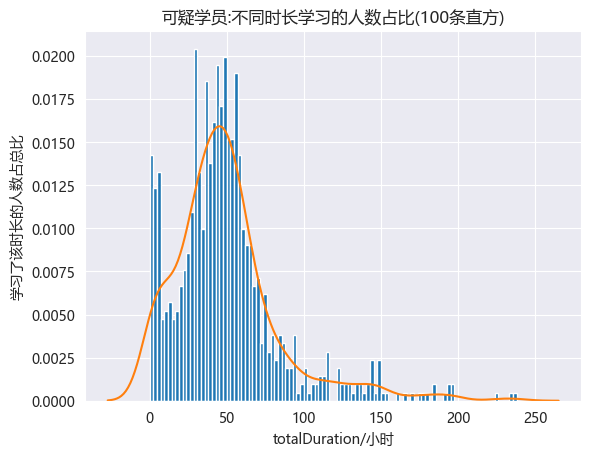

In [35]:
plt.hist(sus_duration['totalDuration'], density=True, bins=100)

sns.kdeplot(sus_duration['totalDuration'], label='密度图')

plt.title("可疑学员:不同时长学习的人数占比(100条直方)")
plt.xlabel('totalDuration/小时')
plt.ylabel('学习了该时长的人数占总比')

plt.savefig('../../imgs/可疑学员的学习时长-概率分布图.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()